In [209]:
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
import cv2
import numpy as np

In [210]:
CATEGORIES = ['മ', 'ഭ', 'ന' , 'ക' , 'വ' , 'റ', 'ഒ' ]
DATADIR = "/content/DATASET"
training_data = []

In [211]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)

    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (28, 28))
        training_data.append([new_array, class_num])

random.shuffle(training_data)

In [212]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, 28, 28, 1)
y = np.array(y).astype(float)

X = X/255.0  # Normailizing the dataset

In [213]:
!pip install Augmentor
import Augmentor


In [214]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [215]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    validation_split=0.2
)

In [216]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(7))  # Equal to the no. of categories
model.add(Activation('softmax'))

model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
        )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [217]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [218]:
history = model.fit(X, y, batch_size=32, epochs=25, validation_data=(X_val, y_val))




Epoch 1/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.1448 - loss: 1.9588 - val_accuracy: 0.1714 - val_loss: 1.9156
Epoch 2/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.2507 - loss: 1.8495 - val_accuracy: 0.3571 - val_loss: 1.7727
Epoch 3/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.4987 - loss: 1.5327 - val_accuracy: 0.4857 - val_loss: 1.5190
Epoch 4/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.5903 - loss: 1.1785 - val_accuracy: 0.6286 - val_loss: 1.2373
Epoch 5/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.6973 - loss: 0.9395 - val_accuracy: 0.6714 - val_loss: 1.0802
Epoch 6/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.6930 - loss: 0.8479 - val_accuracy: 0.7571 - val_loss: 0.9484
Epoch 7/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.7493 - loss: 0.7091 - val_accuracy: 0.6857 - val_loss: 0.7865
Epoch 8/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.8040 - loss: 0.6223 - val_accuracy: 0.

In [219]:
result = []

for category in CATEGORIES:
    folder_path = os.path.join('DATASET', category)

    # Loop through each image in the subfolder
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        image = cv2.imread(img_path, 0)  # Read in grayscale

        if image is None:
            print(f"Error: Could not read {img_path}")
            continue  # Skip if image is invalid

     # Preprocess the image
        image = cv2.resize(image, (28, 28))  # Resize to 28x28
        image = image.reshape(-1, 28, 28, 1).astype(float) / 255.0  # Normalize

        # Predict and store results
        prediction = np.argmax(model.predict(image), axis=1)
        result.append([category, CATEGORIES[prediction[0]]])  # [True Label, Predicted Label]

# Print results
for true_label, predicted_label in result:
    print(f"True: {true_label}, Predicted: {predicted_label}")






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━

In [220]:
wrong = 0
right = 0
for i, j in result:
    if i == j:
        right += 1
wrong = len(result) - right
print(f'Correct Prediction: {right}')
print(f'Wrong Prediction: {wrong}')
print(f'Accuracy: {round(right / len(result), 3) * 100}')

Correct Prediction: 344
Wrong Prediction: 6
Accuracy: 98.3


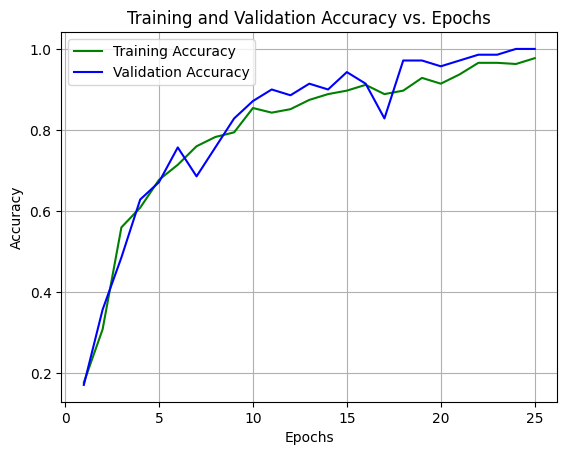

In [221]:
import matplotlib.pyplot as plt


# Extract training and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

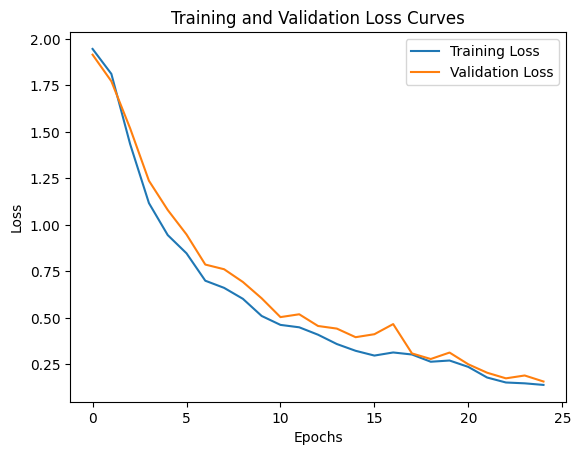

In [222]:
# Plot train and test loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step 


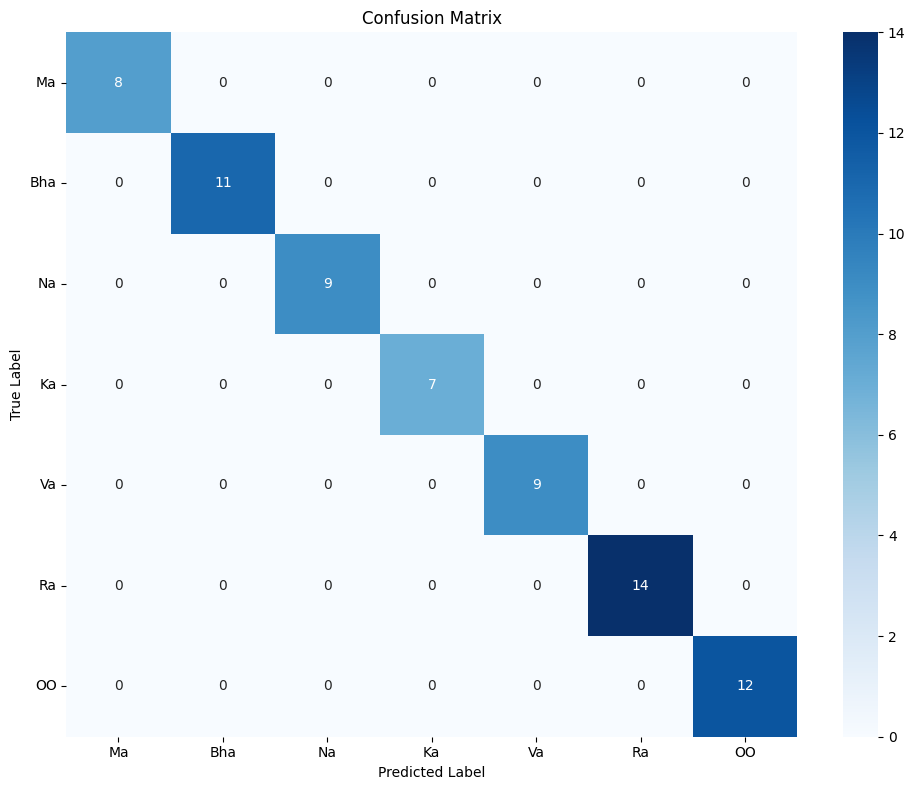

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


char_map = {
    'മ': 'Ma', 'ഭ': 'Bha', 'ന': 'Na', 'ക': 'Ka',
    'വ': 'Va', 'റ': 'Ra', 'ഒ': 'OO',
}

# After model training, get predictions on validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class numbers

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)


CATEGORIES_ENGLISH = [char_map.get(char, char) for char in CATEGORIES]


# Plot confusion matrix with mapped labels
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=CATEGORIES_ENGLISH,
            yticklabels=CATEGORIES_ENGLISH)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [224]:
tf.keras.models.save_model(
    model,
    './weights.h5',
    overwrite=True,
    include_optimizer=True
)

testing


In [225]:
import cv2
from tensorflow.keras.models import load_model
import numpy as np

In [226]:
def preprocessing(input_image, edge=False, inv_thresh=False):
    gray_img = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    gray_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
    if inv_thresh:
        ret, im_th = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        im_th = cv2.adaptiveThreshold(im_th, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 75, 10)
        im_th = cv2.bitwise_not(im_th)
    else:
        ret, im_th = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        im_th = cv2.adaptiveThreshold(im_th, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 75, 10)
    if edge:
        edge_image = cv2.Canny(im_th, 0, 255)
        return edge_image
    return im_th


In [227]:
CATEGORIES = ['മ', 'ഭ', 'ന' , 'ക' , 'വ' , 'റ', 'ഒ' ]

In [228]:

abs_path = r'/content/DATASET/TEST/test1.jpg'
img = cv2.imread(abs_path)



if img is None:
    print("Error: Image not loaded. Check the file path!")
else:
    edged = preprocessing(img, edge=True, inv_thresh=True)



In [229]:
import cv2
import numpy as np


contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(ctr) for ctr in contours]
result = ''
model = load_model('weights.h5')

for index, rect in enumerate(rects):
    roi = img[rect[1]:rect[1] + rect[3], rect[0]:rect[0] + rect[2]]
    roi = preprocessing(roi)
    image = cv2.resize(roi, (28, 28))
    image = image.reshape(-1, 28, 28, 1).astype(float)
    prediction = np.argmax(model.predict(image), axis=-1)



    char_map = {'മ': 'Ma', 'ഭ': 'Bha', 'ന': 'Na', 'ക': 'Ka', 'വ': 'Va', 'റ': 'Ra', 'ഒ': 'OO'}
    display_char = char_map.get(CATEGORIES[prediction[0]], '?')

    cv2.putText(img, display_char, (rect[0], rect[1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    result += CATEGORIES[prediction[0]]

cv2.imwrite('output.jpg', img)
print("Predicted Text:", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Text: ഭറകന
